In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_climatico.csv')
dt = df.copy()

In [3]:
df.describe()

,temperatura_media,precipitazioni,umidita,velocita_vento
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.611352,10.156891,60.440853,47.614261
std,13.285324,5.848920,17.247891,28.398370
min,-9.975432,0.001474,30.104270,0.007245
25%,1.599811,5.159648,46.463658,22.837375
50%,12.102023,10.268888,59.888175,46.657152
75%,24.227105,15.387652,75.493739,71.861337
max,34.991386,19.970532,89.997841,99.573267


### Controllo valori Null

In [4]:
df.isnull().sum()

data_osservazione         0
temperatura_media         0
precipitazioni            0
umidita                   0
velocita_vento            0
stazione_meteorologica    0
dtype: int64

### Colonne da standardizzare

In [5]:
colonne_z = ['temperatura_media', 'precipitazioni', 'umidita', 'velocita_vento']

In [6]:
scaler = StandardScaler()
scaler.fit(dt[colonne_z])

StandardScaler()

In [7]:
dt[colonne_z] = scaler.transform(df[colonne_z])

In [8]:
dt

,data_osservazione,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
0,2022-01-01,-0.697834,1.121457,0.324110,0.985288,Stazione Napoli
1,2022-01-02,1.658987,-0.083426,-0.437926,-0.882412,Stazione Roma
2,2022-01-03,-0.857574,1.277263,1.253766,0.429036,Stazione Milano
3,2022-01-04,-1.343927,1.397793,-0.676068,-1.589030,Stazione Milano
4,2022-01-05,1.519844,-0.808394,0.241011,1.262520,Stazione Milano
...,...,...,...,...,...,...
995,2024-09-22,-1.350427,0.842443,1.321329,-0.132700,Stazione Milano
996,2024-09-23,1.373938,0.722657,-0.161716,-0.701789,Stazione Napoli
997,2024-09-24,0.700065,0.176962,-0.981245,1.679376,Stazione Roma
998,2024-09-25,0.382273,0.262744,-0.647043,1.148874,Stazione Milano


In [9]:
dt.describe()

,temperatura_media,precipitazioni,umidita,velocita_vento
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.030287e-16,-1.776357e-17,-1.776357e-17,-7.283063e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.700981e+00,-1.737158e+00,-1.759738e+00,-1.677238e+00
25%,-8.292648e-01,-8.548148e-01,-8.107767e-01,-8.729122e-01
50%,-3.835692e-02,1.915798e-02,-3.205923e-02,-3.371982e-02
75%,8.747672e-01,8.947598e-01,8.731745e-01,8.542465e-01
max,1.685411e+00,1.678695e+00,1.714516e+00,1.830563e+00


### Creare grafici (istogrammi, box plots) per visualizzare la distribuzione di ciascuna variabile normalizzata.

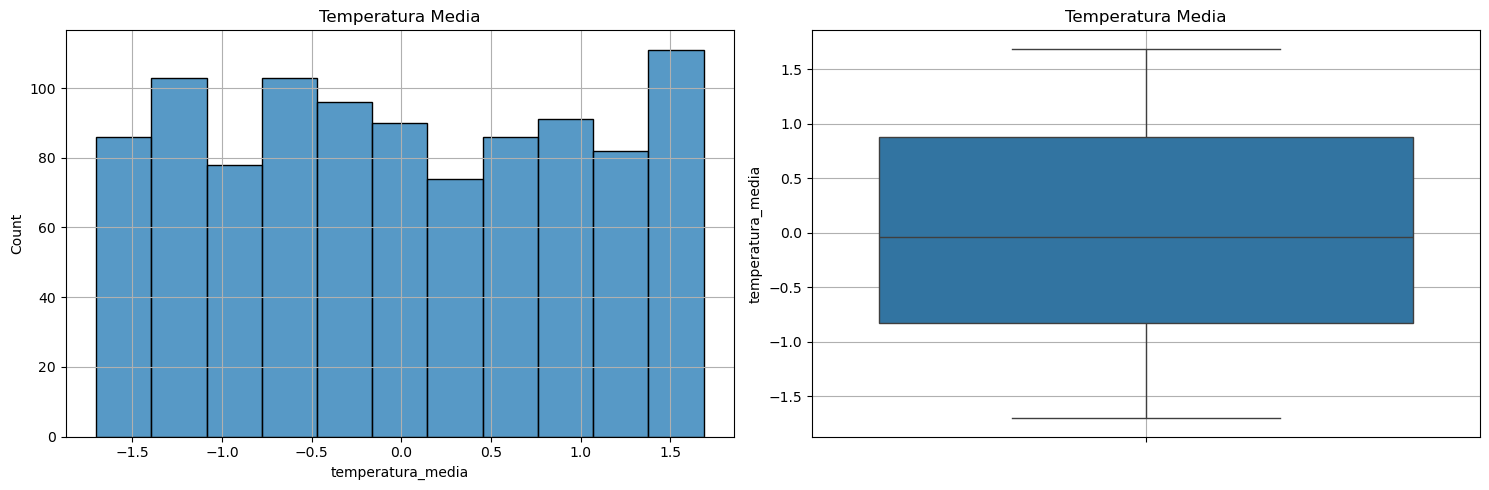

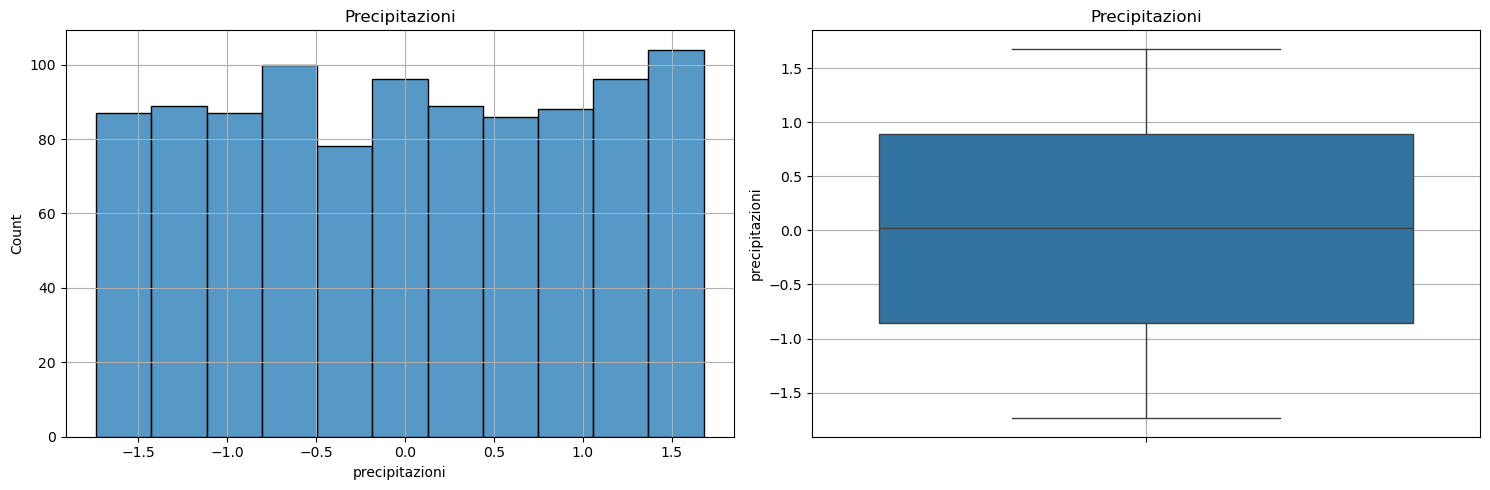

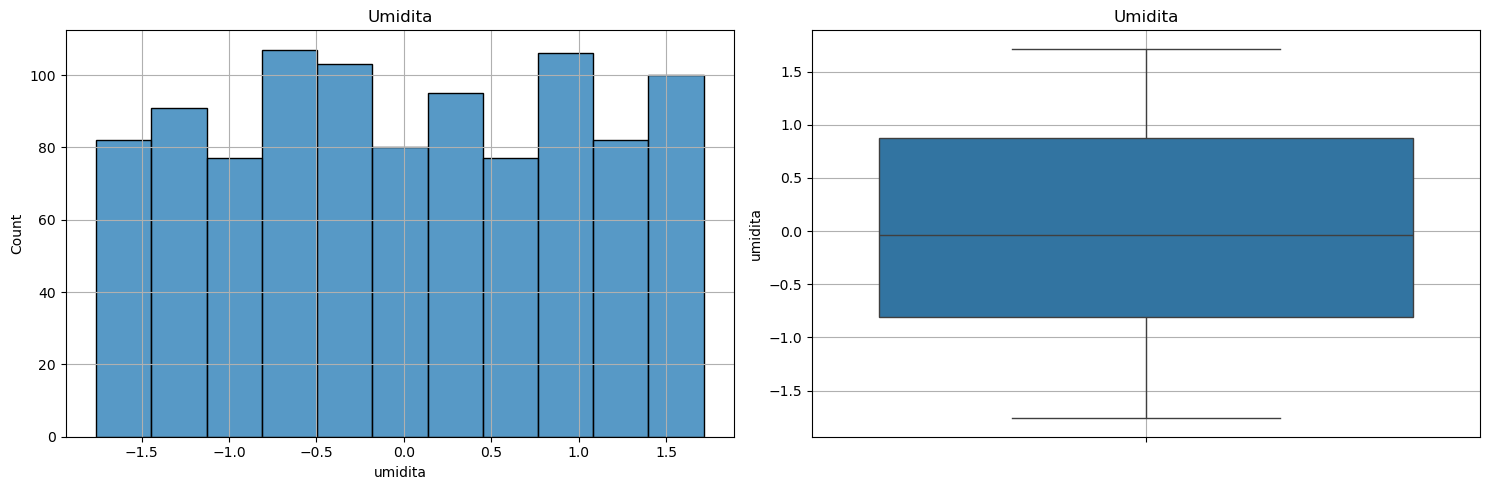

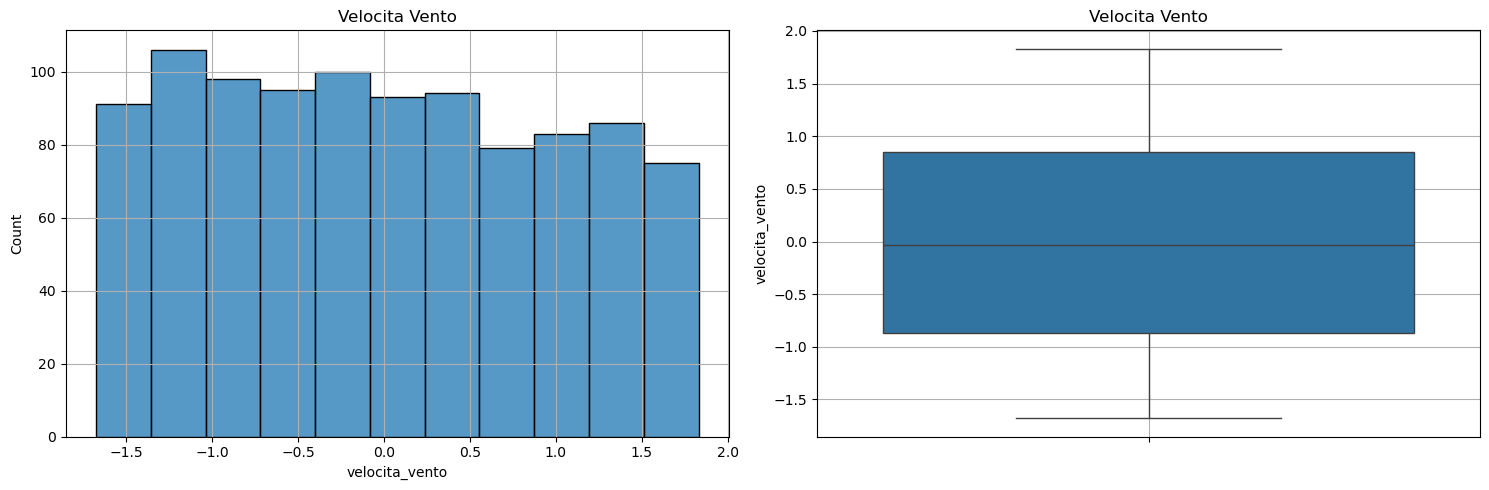

In [10]:
for i in colonne_z:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.histplot(data=dt[i], ax=ax1)
    sns.boxplot(data=dt[i], ax=ax2)
    ax1.set_title(i.replace('_',' ').title())
    ax2.set_title(i.replace('_',' ').title())
    ax1.grid(True)
    ax2.grid(True)
    plt.tight_layout()
    plt.show()

### Analisi di Correlazione: Utilizzare una heatmap per visualizzare la correlazione tra le diverse variabili meteorologiche. Identificare eventuali correlazioni significative (es. tra temperatura e umidità

In [11]:
dt['data_osservazione'] = pd.to_datetime(dt['data_osservazione'])

In [12]:
dt.set_index('data_osservazione', inplace=True)

In [13]:
dt

,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
data_osservazione,,,,,
2022-01-01,-0.697834,1.121457,0.324110,0.985288,Stazione Napoli
2022-01-02,1.658987,-0.083426,-0.437926,-0.882412,Stazione Roma
2022-01-03,-0.857574,1.277263,1.253766,0.429036,Stazione Milano
2022-01-04,-1.343927,1.397793,-0.676068,-1.589030,Stazione Milano
2022-01-05,1.519844,-0.808394,0.241011,1.262520,Stazione Milano
...,...,...,...,...,...
2024-09-22,-1.350427,0.842443,1.321329,-0.132700,Stazione Milano
2024-09-23,1.373938,0.722657,-0.161716,-0.701789,Stazione Napoli
2024-09-24,0.700065,0.176962,-0.981245,1.679376,Stazione Roma


In [14]:
matrix = dt.corr(numeric_only=True)
matrix

,temperatura_media,precipitazioni,umidita,velocita_vento
temperatura_media,1.000000,-0.003993,-0.052520,-0.021765
precipitazioni,-0.003993,1.000000,0.026664,-0.001567
umidita,-0.052520,0.026664,1.000000,0.055076
velocita_vento,-0.021765,-0.001567,0.055076,1.000000


<Axes: >

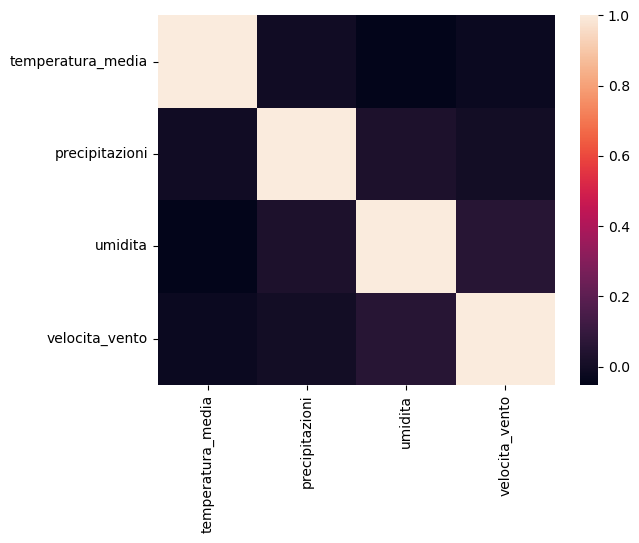

In [16]:
sns.heatmap(matrix)

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


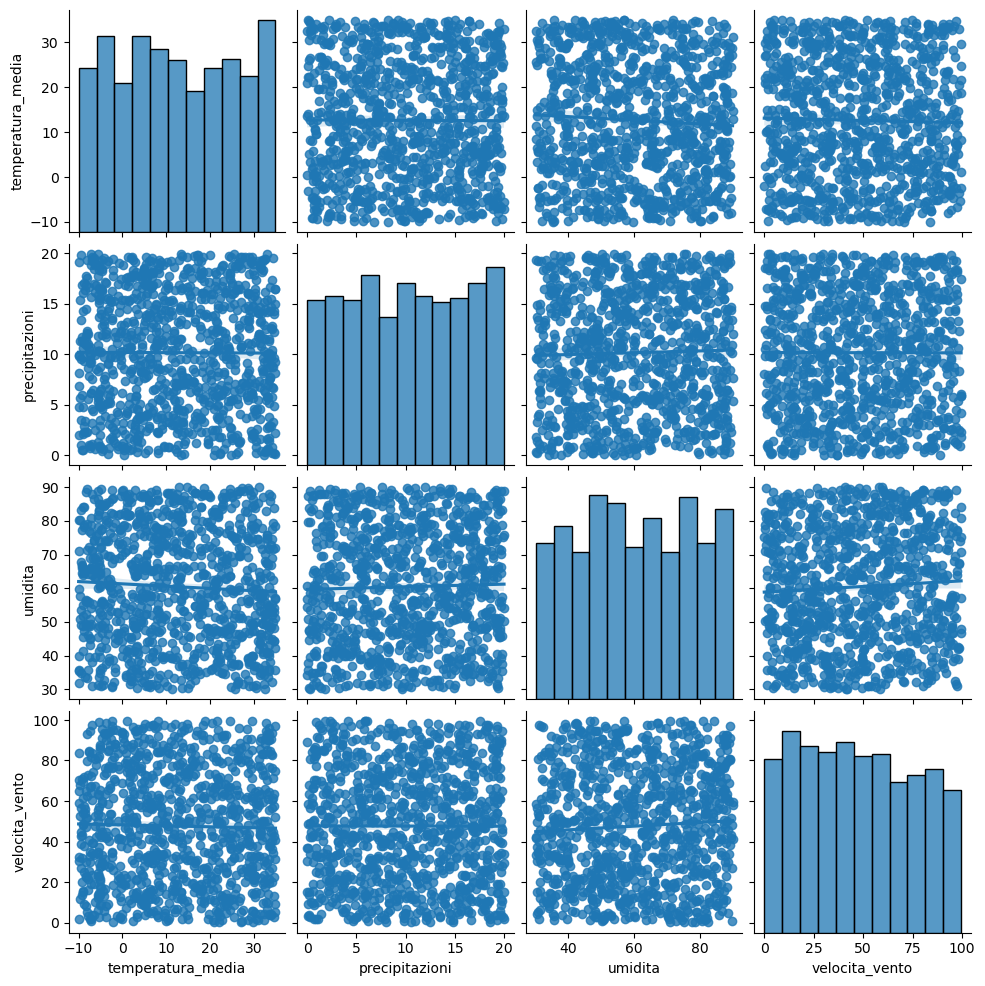

In [32]:
sns.pairplot(df, kind='reg')
plt.show()

<Axes: xlabel='temperatura_media', ylabel='umidita'>

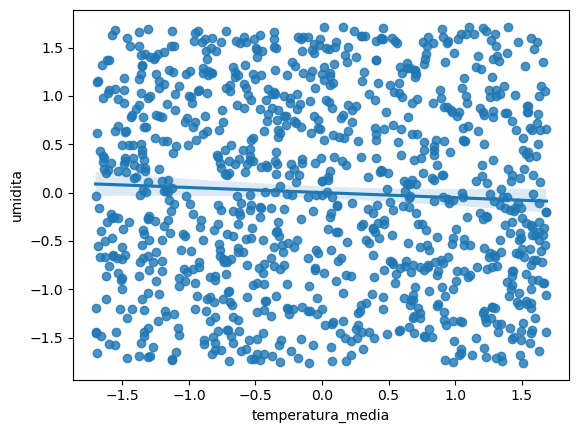

In [27]:
sns.regplot(dt, x='temperatura_media', y='umidita')